# Energy Efficiency in 5G Networks Using Gaussian Mixture Models

## Objective
To cluster 5G traffic patterns using Gaussian Mixture Models (GMM) and estimate energy efficiency dynamically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

## Gaussian Mixture Model

GMM models data as a mixture of multiple Gaussian distributions.
Each component has its own mean and covariance matrix.
Model selection is performed using Bayesian Information Criterion (BIC).

In [2]:
np.random.seed(42)

low = np.random.normal([20, 30], [5, 5], (200, 2))
medium = np.random.normal([50, 60], [7, 7], (200, 2))
high = np.random.normal([80, 90], [6, 6], (200, 2))

data = np.vstack((low, medium, high))

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [3]:
bic_scores = []

for k in range(1, 6):
    gmm_test = GaussianMixture(n_components=k, random_state=42)
    gmm_test.fit(data_scaled)
    bic_scores.append(gmm_test.bic(data_scaled))

print("BIC Scores:", bic_scores)

best_k = bic_scores.index(min(bic_scores)) + 1
print("Optimal number of components:", best_k)

BIC Scores: [2122.3223934697917, 1782.9858563336418, 1294.2272076513889, 1327.7541072610968, 1361.1112875578683]
Optimal number of components: 3


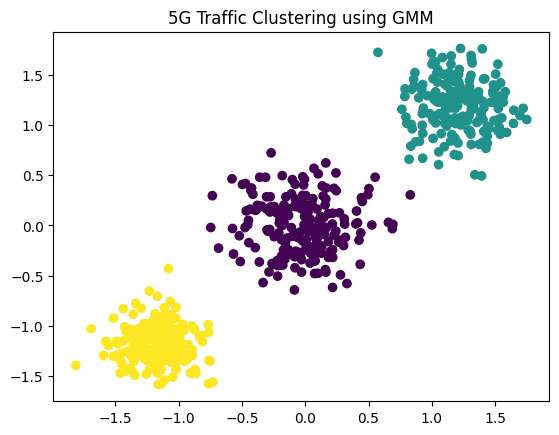

In [4]:
gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(data_scaled)
labels = gmm.predict(data_scaled)

plt.figure()
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels)
plt.title("5G Traffic Clustering using GMM")
plt.show()

In [5]:
energy_map = {0: 50, 1: 80, 2: 120}

total_energy = sum([energy_map[label] for label in labels])

print("Estimated Total Energy Consumption:", total_energy)

Estimated Total Energy Consumption: 50000
